In [141]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [142]:
import numpy as np
import pandas as pd

In [143]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [179]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [180]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [181]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [182]:
# We can view all of the classes that automap found
base.classes.keys()

['station', 'measurement']

In [183]:
# Save references to each table
station = base.classes.station
measurement = base.classes.measurement


In [184]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [203]:
# retrieve last date in data frame
session.query(measurement.date).order_by(measurement.date.desc()).first()

(u'2017-08-23')

In [186]:
# Calculate the date 1 year ago from the last data point in the database
yearAgo = dt.date(2017, 8, 23)- dt.timedelta(days=365)

print(yearAgo)

2016-08-23


In [213]:
# Perform a query to retrieve the data and precipitation scores
precept = session.query(measurement.date, measurement.prcp).\
filter(measurement.date > yearAgo).\
order_by(measurement.date).all()

print(precept)

[(u'2016-08-24', 0.08), (u'2016-08-24', 2.15), (u'2016-08-24', 2.28), (u'2016-08-24', None), (u'2016-08-24', 1.22), (u'2016-08-24', 2.15), (u'2016-08-24', 1.45), (u'2016-08-25', 0.08), (u'2016-08-25', 0.08), (u'2016-08-25', 0.0), (u'2016-08-25', 0.0), (u'2016-08-25', 0.21), (u'2016-08-25', 0.06), (u'2016-08-25', 0.11), (u'2016-08-26', 0.0), (u'2016-08-26', 0.03), (u'2016-08-26', 0.02), (u'2016-08-26', 0.04), (u'2016-08-26', 0.0), (u'2016-08-26', 0.01), (u'2016-08-27', 0.0), (u'2016-08-27', 0.18), (u'2016-08-27', 0.02), (u'2016-08-27', 0.0), (u'2016-08-27', 0.12), (u'2016-08-27', None), (u'2016-08-28', 0.01), (u'2016-08-28', 0.14), (u'2016-08-28', 0.14), (u'2016-08-28', 0.14), (u'2016-08-28', 0.6), (u'2016-08-28', 2.07), (u'2016-08-29', 0.0), (u'2016-08-29', 0.17), (u'2016-08-29', 0.04), (u'2016-08-29', None), (u'2016-08-29', 0.0), (u'2016-08-29', 0.35), (u'2016-08-29', 0.9), (u'2016-08-30', 0.0), (u'2016-08-30', 0.0), (u'2016-08-30', 0.02), (u'2016-08-30', 0.0), (u'2016-08-30', 0.0), (

In [196]:
# Save as a PD DataFrame and  Set the index to the date column and sort the dataframe by date
precept_df = pd.DataFrame(precept)
precept_df.set_index('date')

precept_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


<function matplotlib.pyplot.show>

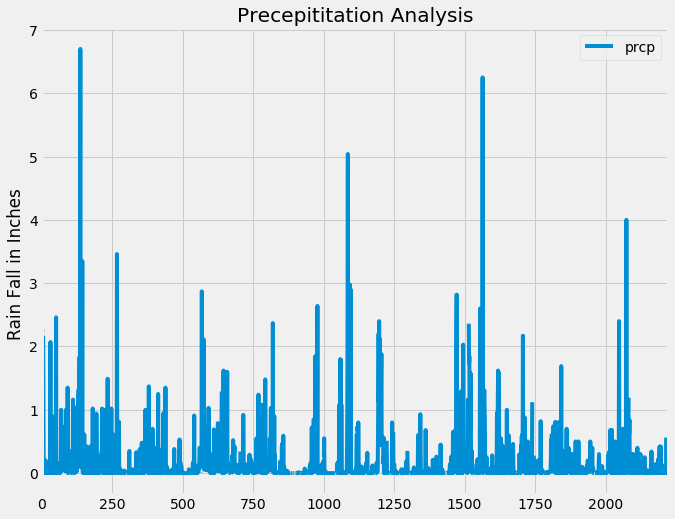

In [207]:
# Use Pandas Plotting with Matplotlib to plot the data
rain = precept_df.plot(title="Precepititation Analysis", figsize=(10,8))
rain.set_ylabel("Rain Fall in Inches ")

plt.show

In [206]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precept_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [223]:
# Design a query to show how many stations are available in this dataset?
session.query(measurement.station).distinct().count()

9

In [230]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
mostActStations = session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()

print(mostActStations)

[(u'USC00519281', 2772), (u'USC00519397', 2724), (u'USC00513117', 2709), (u'USC00519523', 2669), (u'USC00516128', 2612), (u'USC00514830', 2202), (u'USC00511918', 1979), (u'USC00517948', 1372), (u'USC00518838', 511)]


In [246]:
# Choose the station with the highest number of temperature observations.
topStation = "USC00519281"

print(topStation)

USC00519281


In [247]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
actTemps = session.query(func.max(measurement.tobs),func.avg(measurement.tobs), func.min(measurement.tobs)).filter(measurement.station == topStation).all()

print(actTemps)

[(85.0, 71.66378066378067, 54.0)]


In [248]:
# Choose the station with the highest number of temperature observations.

topStation = "USC00519281"

print(topStation)

USC00519281


In [251]:
# Query the last 12 months of temperature observation data for this station 
tempObs = session.query(measurement.station, measurement.tobs).filter(measurement.date >=yearAgo).filter(measurement.station == topStation).all()

print(tempObs)

[(u'USC00519281', 77.0), (u'USC00519281', 77.0), (u'USC00519281', 80.0), (u'USC00519281', 80.0), (u'USC00519281', 75.0), (u'USC00519281', 73.0), (u'USC00519281', 78.0), (u'USC00519281', 77.0), (u'USC00519281', 78.0), (u'USC00519281', 80.0), (u'USC00519281', 80.0), (u'USC00519281', 78.0), (u'USC00519281', 78.0), (u'USC00519281', 78.0), (u'USC00519281', 73.0), (u'USC00519281', 74.0), (u'USC00519281', 80.0), (u'USC00519281', 79.0), (u'USC00519281', 77.0), (u'USC00519281', 80.0), (u'USC00519281', 76.0), (u'USC00519281', 79.0), (u'USC00519281', 75.0), (u'USC00519281', 79.0), (u'USC00519281', 78.0), (u'USC00519281', 79.0), (u'USC00519281', 78.0), (u'USC00519281', 78.0), (u'USC00519281', 76.0), (u'USC00519281', 74.0), (u'USC00519281', 77.0), (u'USC00519281', 78.0), (u'USC00519281', 79.0), (u'USC00519281', 79.0), (u'USC00519281', 77.0), (u'USC00519281', 80.0), (u'USC00519281', 78.0), (u'USC00519281', 78.0), (u'USC00519281', 78.0), (u'USC00519281', 77.0), (u'USC00519281', 79.0), (u'USC00519281'

In [260]:
# make into df 
tempObs_df = pd.DataFrame(tempObs)
tempObs_df.head()

,station,tobs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0


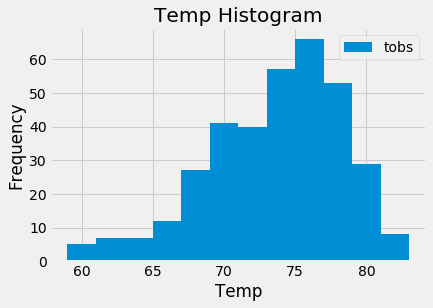

In [259]:
# plot the results as a histogram
tempObs_df.plot(kind='hist', bins=12)
plt.ylabel("Frequency")
plt.xlabel("Temp")
plt.title("Temp Histogram")

plt.show()